# Iris Flower Classification

## 1. Introduction

The Iris Flower Classification project is a classic machine learning task that involves predicting the species of iris flowers based on their physical characteristics. This dataset is widely used for demonstrating classification algorithms and serves as a benchmark for evaluating model performance.

## 2. Dataset Overview

The dataset used in this project is the Iris dataset, which consists of 150 samples of iris flowers. Each sample includes the following features:

- **Sepal Length**: The length of the sepal in centimeters.
- **Sepal Width**: The width of the sepal in centimeters.
- **Petal Length**: The length of the petal in centimeters.
- **Petal Width**: The width of the petal in centimeters.
- **Species**: The target variable indicating the species of the iris flower, which can be one of the following:
  - Iris-setosa
  - Iris-versicolor
  - Iris-virginica

### 2.1 Data Description

The dataset contains:
- **150 samples**: Equal representation of each species (50 samples per species).
- **4 features**: Continuous numerical values representing the physical dimensions of the flowers.

## 3. Methodology

The following steps outline the methodology used in this classification task:

### 3.1 Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


### 3.2 Load Data

The dataset is loaded into a Pandas DataFrame.

In [24]:
data = pd.read_csv("iris.csv")

### 3.3 Exploratory Data Analysis (EDA)

- **View Data**: Display the first and last few rows of the dataset.
- **Summary Statistics**: Generate descriptive statistics to understand the data distribution.

In [25]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### 3.4 Data Visualization

In [30]:
df = data.copy()

In [31]:
df['species'] = df['species'].replace({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
sns.set_palette('Set2')

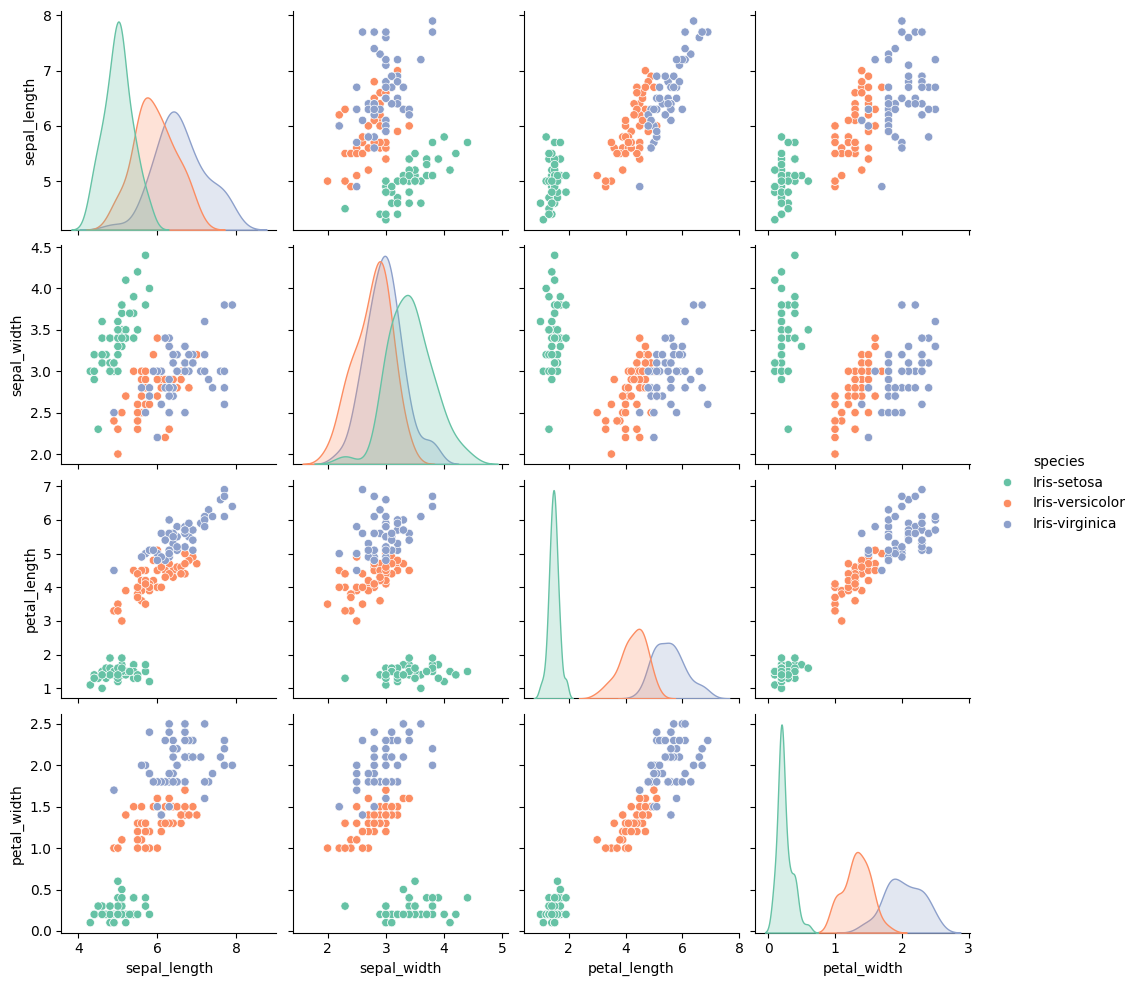

In [33]:
sns.pairplot(df, hue='species')

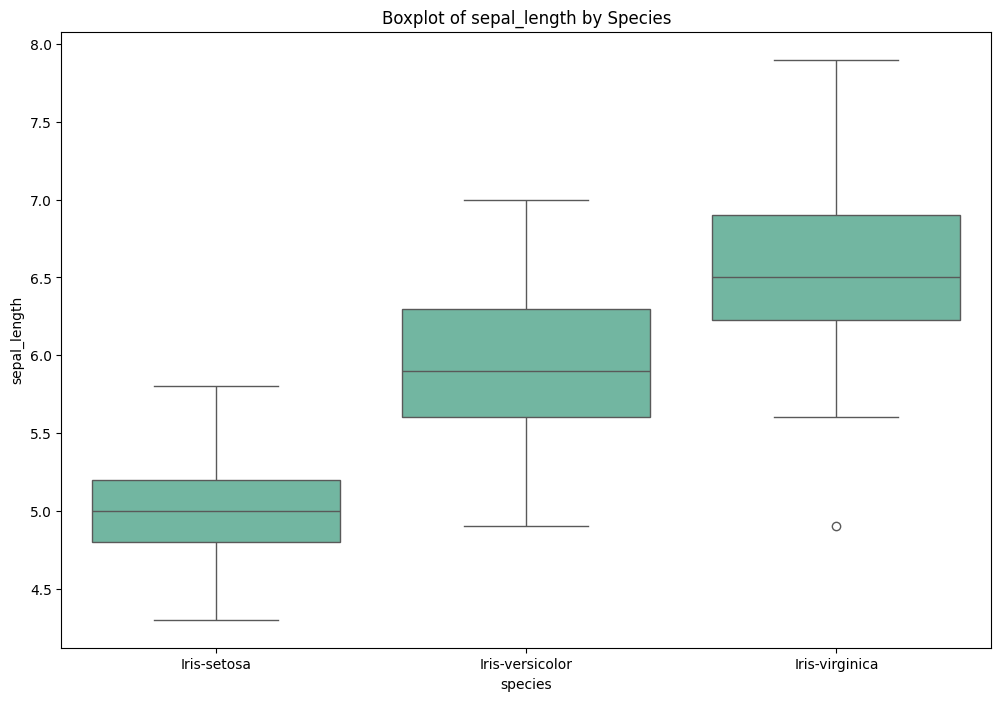

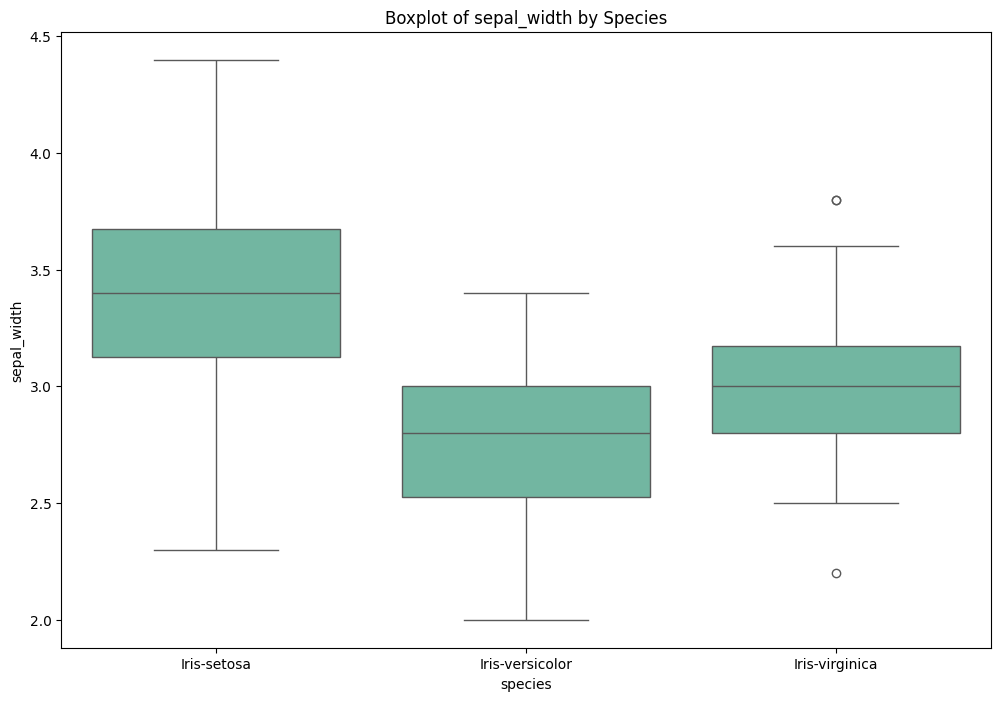

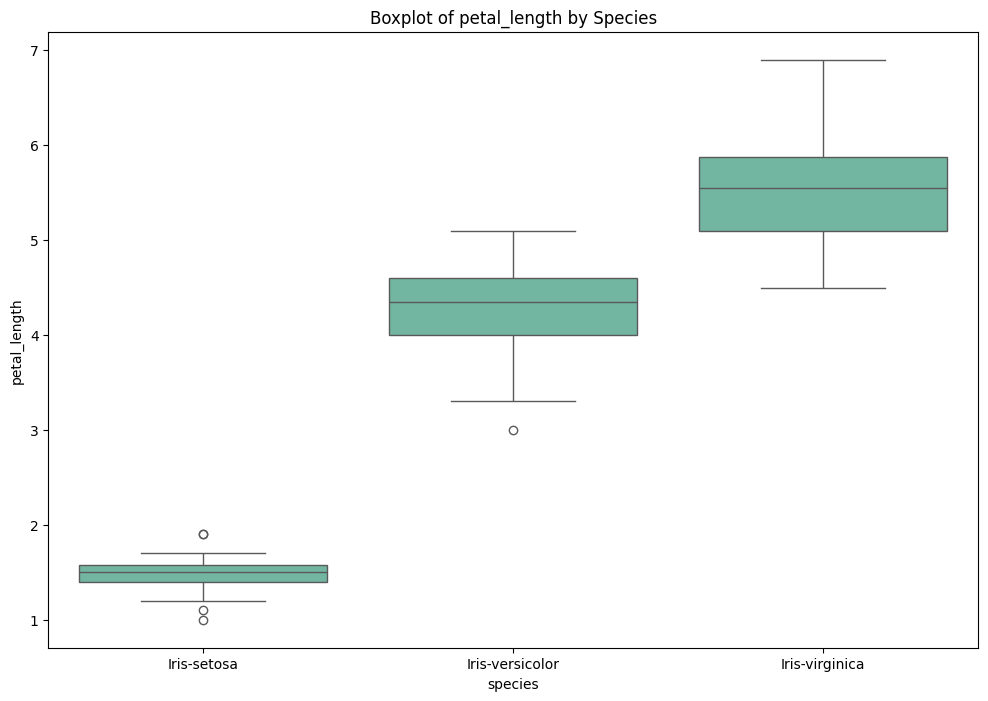

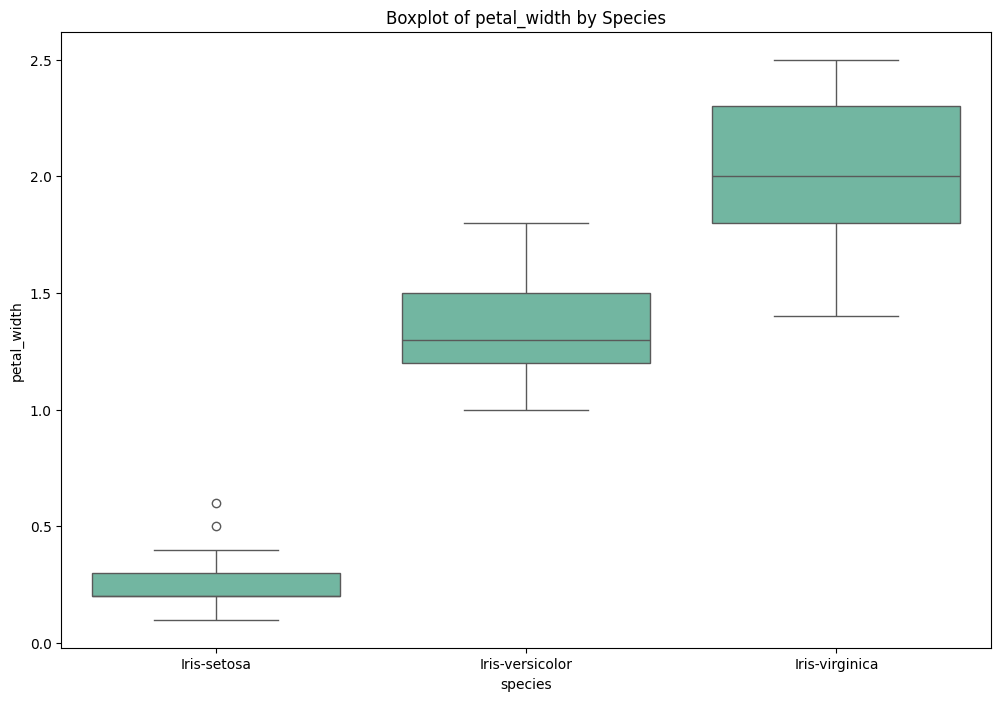

In [34]:
for value in df.drop(columns=['species']):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data = df , x = 'species', y = df[value])
    plt.title(f'Boxplot of {value} by Species')
    plt.show()

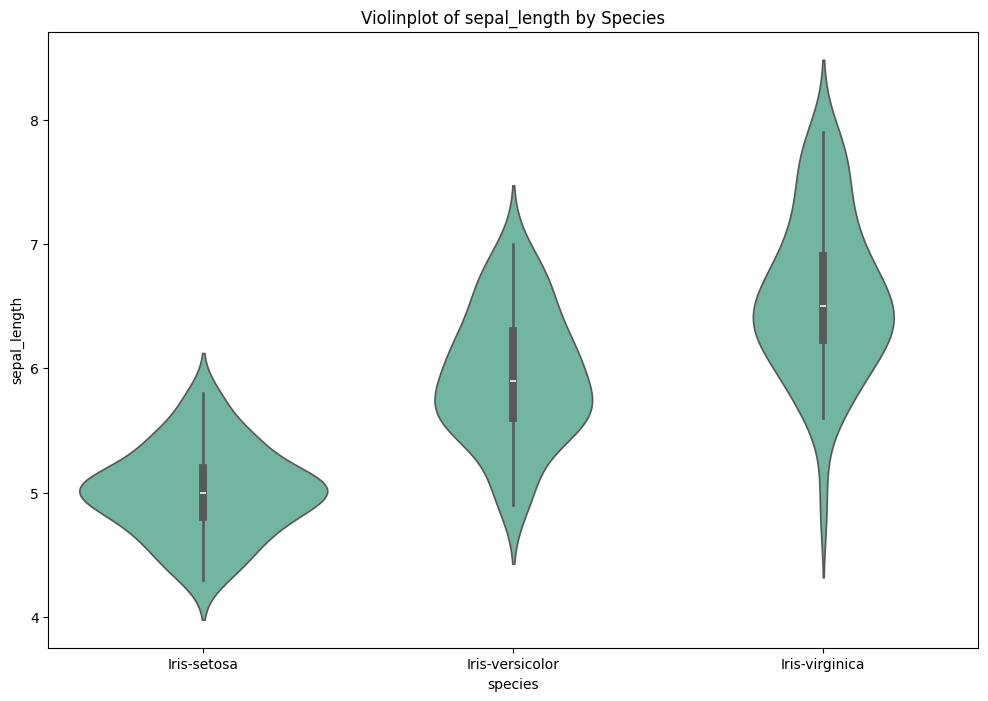

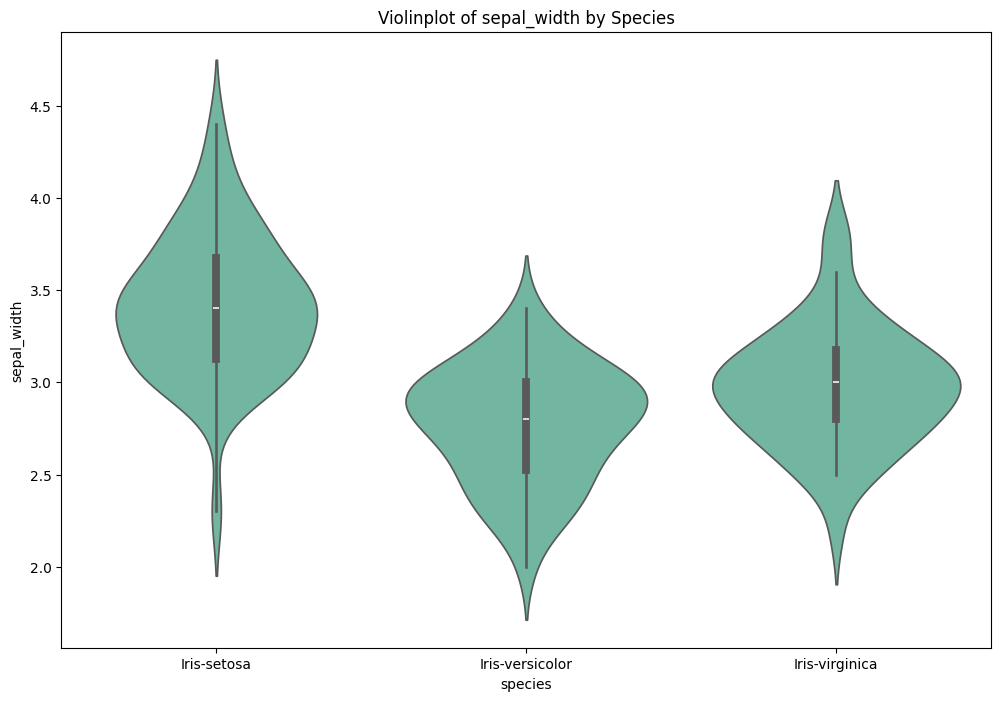

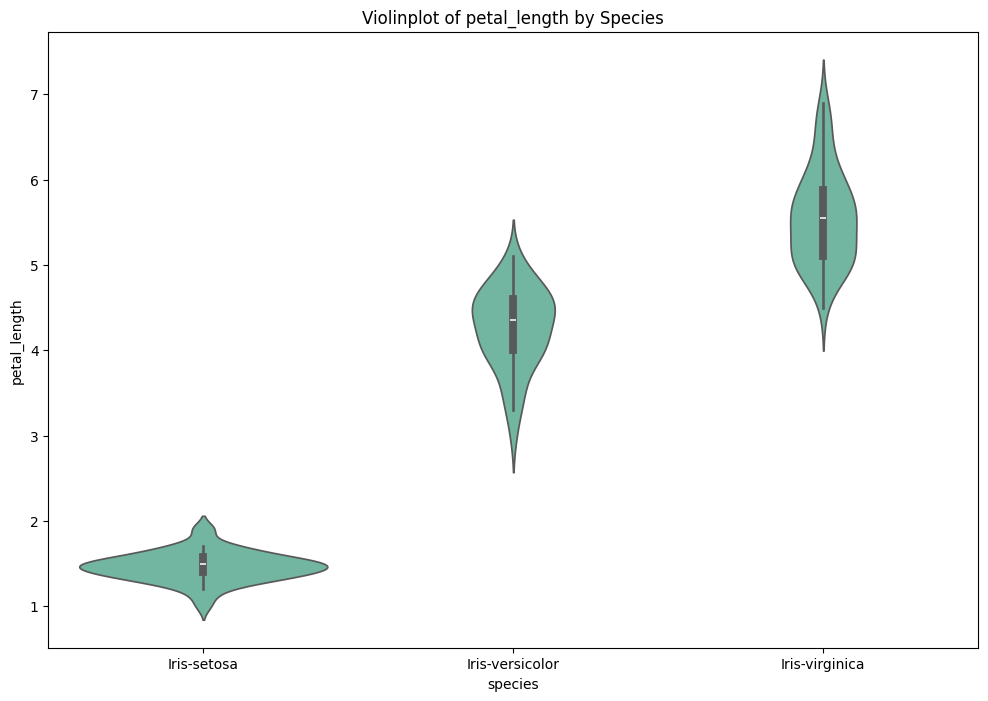

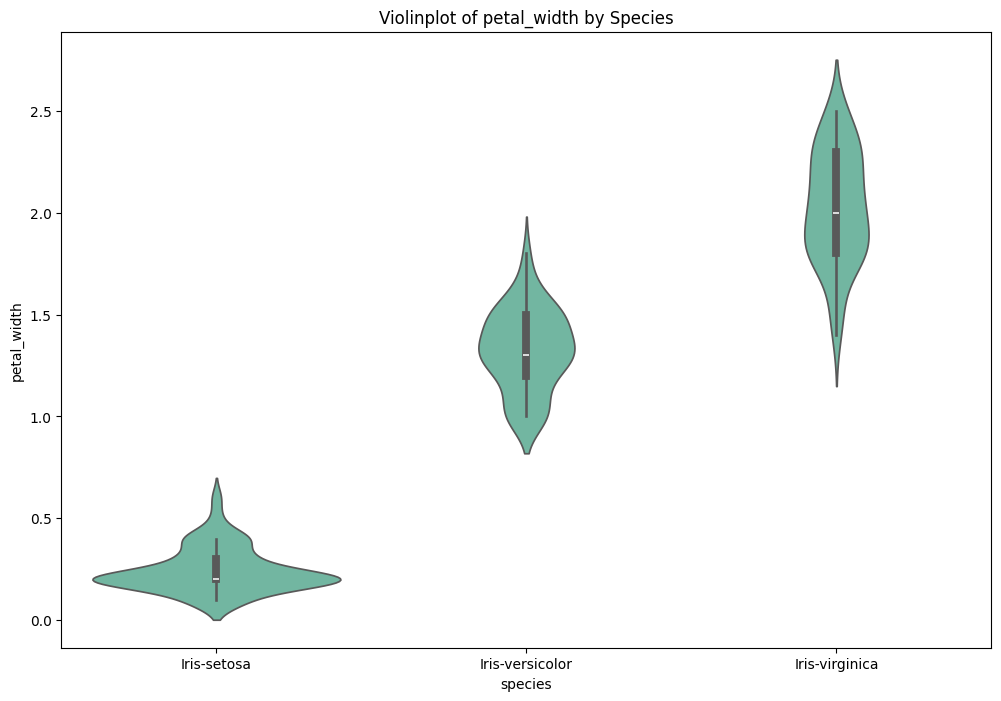

In [35]:
for value in df.drop(columns=['species']):
    plt.figure(figsize=(12, 8))
    sns.violinplot(data = df , x = 'species', y = df[value])
    plt.title(f'Violinplot of {value} by Species')
    plt.show()

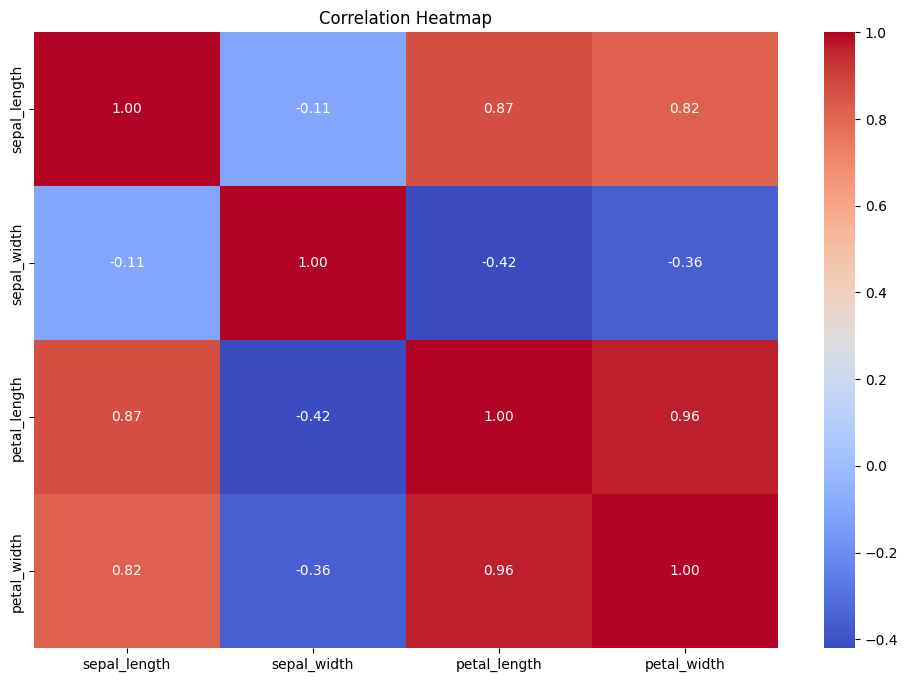

In [36]:
plt.figure(figsize=(12, 8))
correlation = data.drop(columns=['species']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

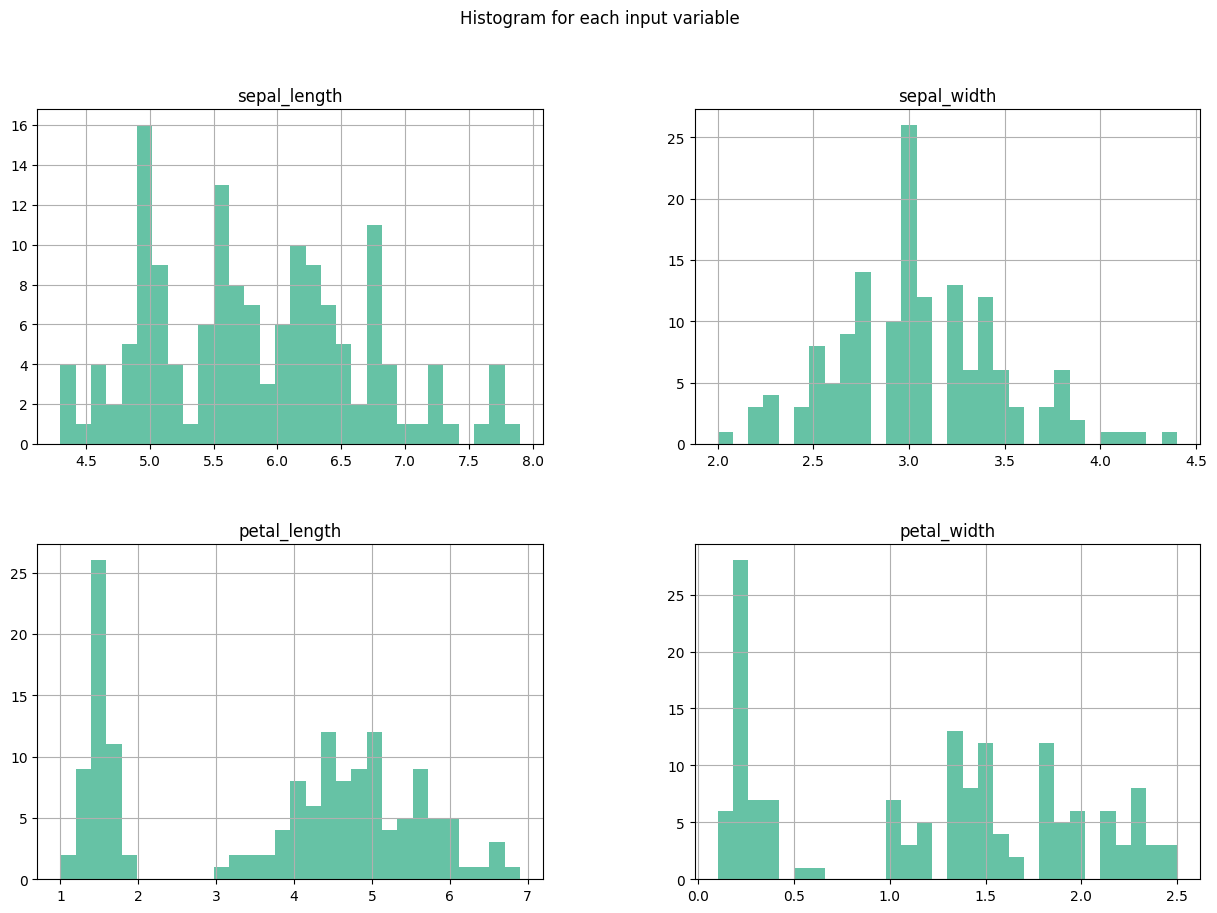

In [37]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram for each input variable")
plt.show()

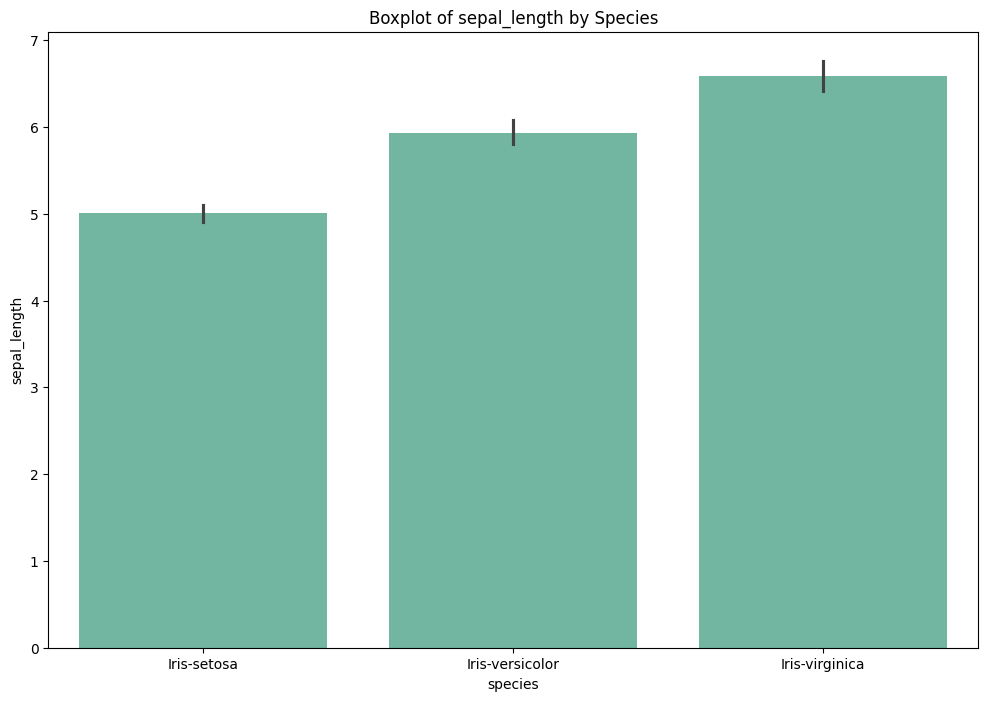

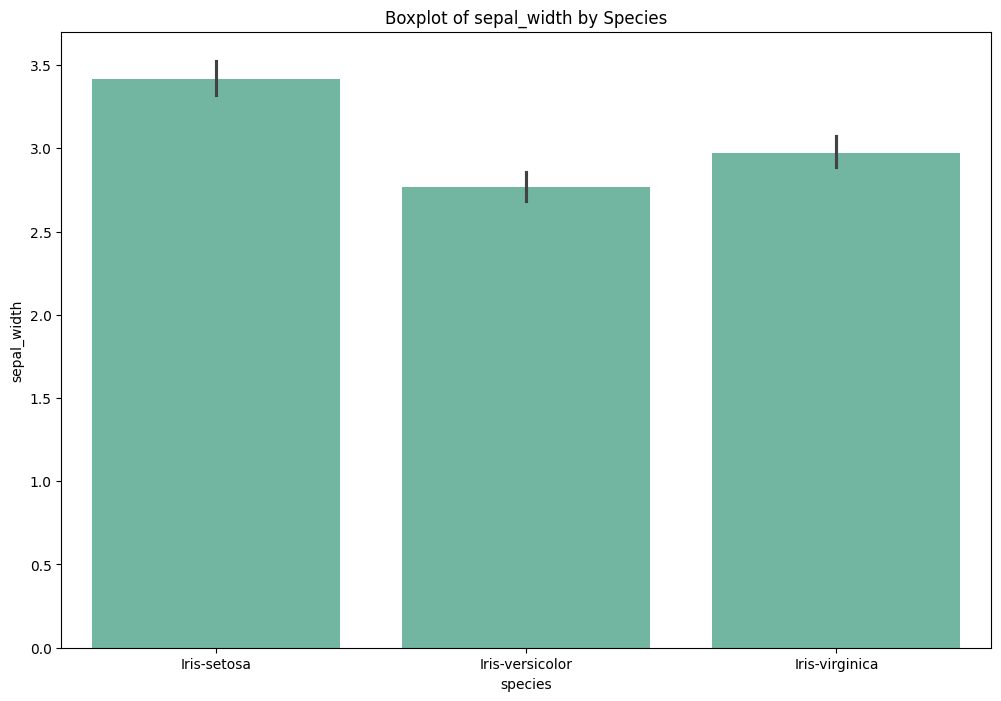

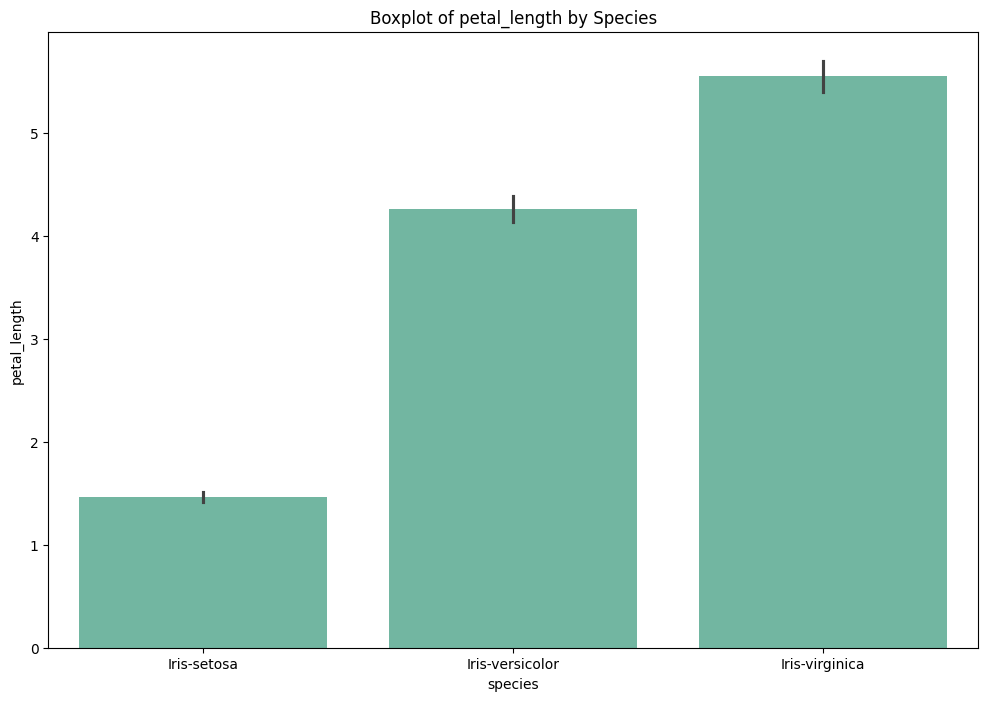

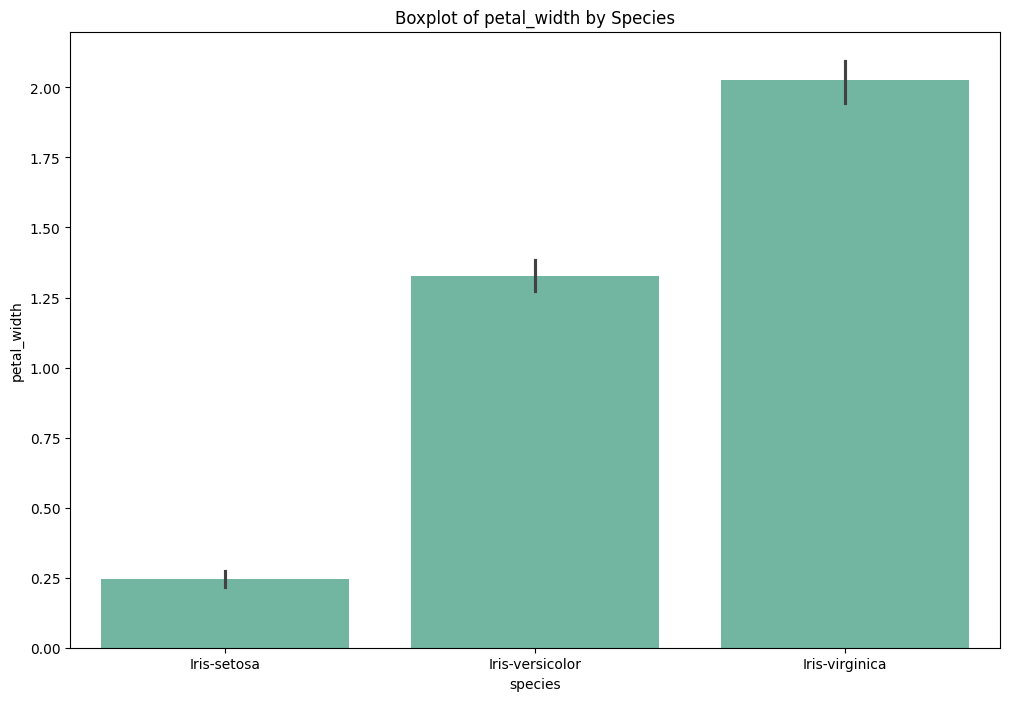

In [38]:
for value in df.drop(columns=['species']):
    plt.figure(figsize=(12, 8))
    sns.barplot(data = df , x = 'species', y = df[value])
    plt.title(f'Boxplot of {value} by Species')
    plt.show()

### 3.4 Feature Selection

- The features are separated from the target variable to prepare for model training. The target variable (species) is encoded into numerical values using Label Encoding.

In [39]:
# Encode the target variable
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

### 3.5 Data Splitting

- The dataset is split into training and testing sets using an 80-20 split. This allows for model training on one subset and evaluation on another to assess performance.

In [40]:
# Split the data into features and target
X = data.drop(columns=['species'])
y = data['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.6 Model Training

- A **Random Forest Classifier** is chosen for this task due to its effectiveness in handling classification problems. The model is trained on the training dataset.

In [41]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.7 Prediction and Evaluation

- Predictions are made on the test dataset, and the model's performance is evaluated using metrics such as accuracy and a classification report, which includes precision, recall, and F1-score.

In [42]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



### 3.8 New Data Prediction

- The trained model can also be used to predict the species of new iris flower samples based on their features.

In [43]:
# Example new data for prediction
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.5],
    'sepal_width': [3.5, 3.0],
    'petal_length': [1.4, 5.5],
    'petal_width': [0.2, 2.0]
})

# Make predictions
predictions = model.predict(new_data)
predicted_species = le.inverse_transform(predictions)
print(predicted_species)
print(predictions)

['Iris-setosa' 'Iris-virginica']
[0 2]


## 4. Results

The results of the model evaluation will be presented, including:
- **Accuracy**: The overall accuracy of the model on the test set.
- **Classification Report**: Detailed metrics for each species, including precision, recall, and F1-score.

## 5. Conclusion

This notebook demonstrates the application of machine learning techniques to classify iris flowers. The Random Forest algorithm has shown to be effective in this classification task, providing insights into the relationships between flower features and species.

## 6. Future Work

Future improvements could include:
- Exploring other classification algorithms (e.g., Support Vector Machines, Neural Networks).
- Performing hyperparameter tuning to optimize model performance.
- Implementing cross-validation for a more robust evaluation of the model.